In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import recall_score

from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler


from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Flatten

from keras.layers.core import Dense, Dropout, SpatialDropout1D
# In[2]:

from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
from keras import metrics

from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 

from keras.layers import Dense, Dropout, Activation, Flatten
def column(matrix, i):
    return [row[i] for row in matrix]

/home/andrew/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
import pandas as pd
df_train = pd.read_json("train.json/train.json")
df_train = pd.DataFrame(df_train)
numpydf_train = df_train.values
df_test = pd.read_json("test.json/test.json")
df_test = pd.DataFrame(df_test)
numpydf_test = df_test.values

In [3]:
print df_train
print df_test

                                                 band_1  \
0     [-27.878361, -27.15416, -28.668615, -29.537971...   
1     [-12.242375, -14.920305, -14.920363, -12.66633...   
2     [-24.603676, -24.603714, -24.871029, -23.15277...   
3     [-22.454607, -23.082819, -23.998013, -23.99805...   
4     [-26.006956, -23.164886, -23.164886, -26.89116...   
5     [-20.769371, -20.769434, -25.906025, -25.90602...   
6     [-26.673811, -23.666162, -27.622442, -28.31768...   
7     [-24.989119, -27.755224, -25.817074, -24.98927...   
8     [-17.146641, -17.146572, -17.994583, -19.44553...   
9     [-24.020853, -23.551275, -27.18819, -29.126434...   
10    [-21.397552, -19.753859, -23.426783, -24.65221...   
11    [-22.020813, -22.020864, -20.345379, -18.07829...   
12    [-21.112206, -21.638832, -25.436468, -23.22255...   
13    [-23.864258, -27.755791, -26.047226, -24.62014...   
14    [-20.558899, -21.328135, -19.585205, -19.71788...   
15    [-28.282215, -27.896156, -25.882795, -25.88279... 

In [4]:
band1_train = df_train['band_1'].values
band2_train = df_train['band_2'].values
inc_angle_train = df_train['inc_angle'].values
print band1_train.shape
print band2_train.shape
print inc_angle_train.shape

band1_test = df_test['band_1'].values
band2_test = df_test['band_2'].values
inc_angle_test = df_test['inc_angle'].values
print band1_test.shape
print band2_test.shape
print inc_angle_test.shape


(1604,)
(1604,)
(1604,)
(8424,)
(8424,)
(8424,)


In [5]:
y_train = df_train['is_iceberg'].values
print y_train

[0 0 1 ..., 0 0 0]


[851, 753]


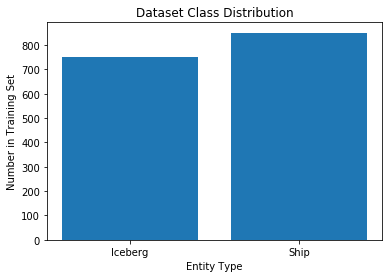

In [6]:
data_split=[0,0]
for i in y_train:
    data_split[i]+=1
print data_split
plt.bar(["Ship","Iceberg"],data_split)
plt.xlabel("Entity Type")
plt.ylabel("Number in Training Set")
plt.title("Dataset Class Distribution")
plt.show()

### As seen above, the data distribution is fairly balanced, which is good.

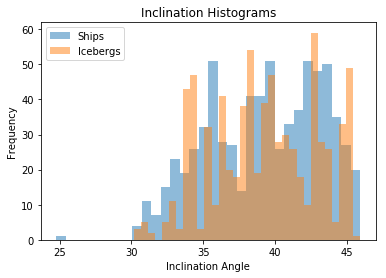

In [7]:
icebergs_train_angle =[]
ships_train_angle=[]
for cnt,i in enumerate(y_train):
    if i == 0:
        if(inc_angle_train[cnt]!='na'):
            ships_train_angle.append(inc_angle_train[cnt])
    else:
        if(inc_angle_train[cnt]!='na'):
            icebergs_train_angle.append(inc_angle_train[cnt])
plt.hist(ships_train_angle, bins = 32, alpha=.5)
plt.hist(icebergs_train_angle, bins = 32,alpha=.5)
plt.ylabel("Frequency")
plt.xlabel("Inclination Angle")
plt.title("Inclination Histograms")
plt.legend(["Ships","Icebergs"])
plt.show()

### There is a lot of cross entropy between these two distribution.

## Attempt to project images based on inclination angle

In [10]:
for cnt,elem in enumerate(inc_angle_test):
    if elem =='na':
        inc_angle_test[cnt] = 0
for cnt,elem in enumerate(inc_angle_train):
    if elem =='na':
        inc_angle_train[cnt] = 0
images_train=[]
for cnt,img in enumerate(band1_train):
    images_train.append([img,band2_train[cnt],(np.array(img)+np.array(band2_train[cnt]))/2])

np3images_train = np.array(images_train)
np3images_train=np.reshape(np3images_train,(1604,75,75,3))
np2images_train=np3images_train[:,:,:,0:2]
print np2images_train.shape

images_test=[]
for cnt,img in enumerate(band1_test):
    images_test.append([img,band2_test[cnt],(np.array(img)+np.array(band2_test[cnt]))/2])
np3images_test = np.array(images_test)
np3images_test=np.reshape(np3images_test,(8424,75,75,3))
np2images_test=np3images_test[:,:,:,0:2]

print np2images_test.shape

(1604, 75, 75, 2)
(8424, 75, 75, 2)


In [46]:
print np2images_train
print np3images_train

[[[[-27.878361  -27.15416  ]
   [-29.537971  -29.092485 ]
   [-32.190609  -29.538139 ]
   ..., 
   [-31.59383   -28.267242 ]
   [-31.593956  -28.267368 ]
   [-27.157106  -27.881393 ]]

  [[-26.813492  -26.485727 ]
   [-26.169926  -30.007677 ]
   [-30.504234  -30.504234 ]
   ..., 
   [-27.511473  -30.01029  ]
   [-26.488548  -28.267412 ]
   [-25.573524  -26.816525 ]]

  [[-25.570534  -23.98695  ]
   [-27.50886   -25.285892 ]
   [-25.865252  -25.286018 ]
   ..., 
   [-27.156897  -29.095139 ]
   [-28.267368  -27.511639 ]
   [-27.511726  -30.010544 ]]

  ..., 
  [[-26.8397715 -27.887169 ]
   [-28.2921405 -30.3424205]
   [-27.2462035 -26.305624 ]
   ..., 
   [-27.378337  -27.744318 ]
   [-31.4241715 -28.761533 ]
   [-28.2769845 -27.6971075]]

  [[-27.741539  -30.3422935]
   [-29.191822  -26.540308 ]
   [-28.089413  -30.062261 ]
   ..., 
   [-30.522278  -29.55322  ]
   [-27.1854125 -27.1924545]
   [-27.712828  -26.495184 ]]

  [[-28.4859275 -28.2740775]
   [-30.8975925 -30.1721295]
   [-29.2

#### We have a set that is just the raw images given in the dataset as well as a second set which has a third image for each example (which is the average of the two images)

43.9239


Text(0.5,1,u'Smoothed Image with Gaussian Filter')

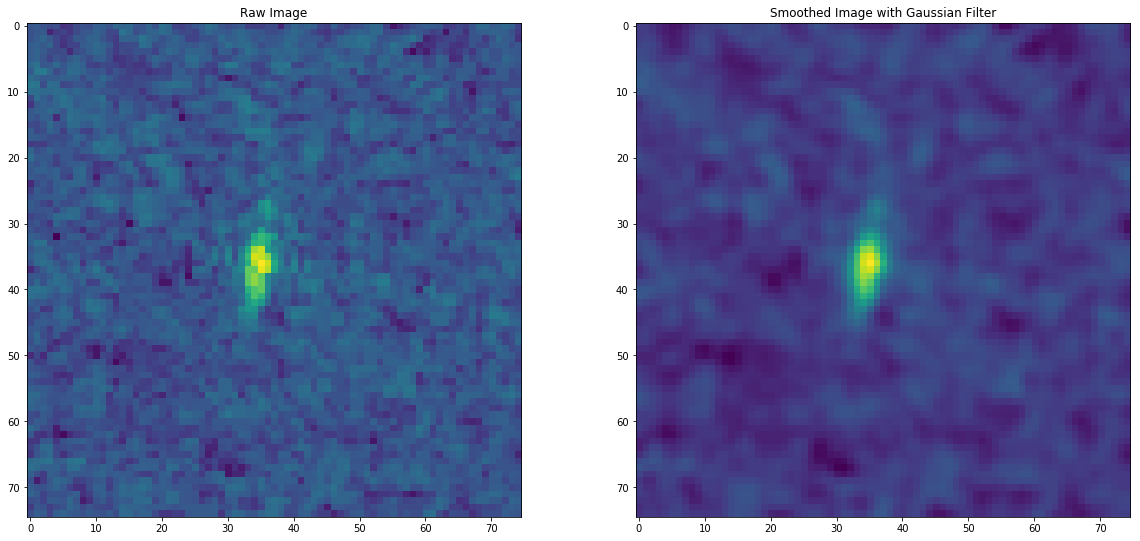

In [11]:
import skimage.filters
import skimage.transform
def getMatrix(angle):
    H=[[np.cos(angle),-np.sin(angle),0],[np.sin(angle),np.cos(angle),0],[0,0,1]]
    return np.array(H)
H=getMatrix(float(inc_angle_train[0]))
print inc_angle_train[0]
f = plt.figure(figsize=(20,20))
f.add_subplot(2,2, 1)
plt.imshow((np.array(band1_train[0]).reshape(75,75)))
plt.title("Raw Image")
f.add_subplot(2,2, 2)
plt.imshow(skimage.filters.gaussian(np.array(band1_train[0]).reshape(75,75)))
plt.title("Smoothed Image with Gaussian Filter")
#f.add_subplot(2,2, 3)

#affine = skimage.transform.ProjectiveTransform(H)
#plt.imshow(skimage.transform.warp(np.array(band1_train[0]).reshape(75,75),affine))
#plt.title("Image projected by inclination angle")
#plt.show(block=True)

(43, 180)


/usr/local/lib/python2.7/dist-packages/skimage/transform/radon_transform.py:58: UserWarning: The default of `circle` in `skimage.transform.radon` will change to `True` in version 0.15.
  warn('The default of `circle` in `skimage.transform.radon` '


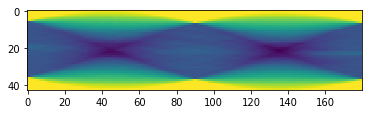

In [12]:
from skimage.transform import radon, iradon
from scipy.ndimage import zoom
img = np.array(band1_train[0]).reshape(75,75)
img = zoom(img, 0.4)
projections = radon(img)
print projections.shape
plt.imshow(projections)


## RNN using rotation angle as a sort of time step. 

In [13]:
sinograms_band1 = []
sinograms_band2 = []
for elem in band1_train:
    sinograms_band1.append((radon(zoom(np.array(elem).reshape(75,75),.4))))
for elem in band2_train:
    sinograms_band2.append((radon(zoom(np.array(elem).reshape(75,75),.4))))


In [14]:
sinograms = np.array(sinograms_band1 + sinograms_band2)
print sinograms.shape

(3208, 43, 180)


In [29]:
sinograms = sinograms.reshape((3208,43,180))
print sinograms.shape

(3208, 43, 180)


In [66]:
from keras.layers.recurrent import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D
SinoNet = Sequential()
#SinoNet.add(SpatialDropout1D(Dropout(0.2),input_shape = (43,180,1,)))
SinoNet.add(LSTM(32,input_shape = (43,180,), dropout=0.2, recurrent_dropout=0.2))
SinoNet.add(Dense(16, activation="softmax"))
SinoNet.add(Dense(8, activation="softmax"))
SinoNet.add(Dense(4, activation="softmax"))
SinoNet.add(Dense(1, activation="softmax"))

In [67]:
print SinoNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                27264     
_________________________________________________________________
dense_43 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_45 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 5         
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
sino_y = np.concatenate((y_train,y_train))
SinoNet.compile(optimizer='adam', loss='binary_crossentropy',
metrics=["accuracy"])
SinoNet.fit(sinograms,sino_y , batch_size=64, nb_epoch=25,
        validation_split=.1)

Train on 2887 samples, validate on 321 samples
Epoch 1/25
2887/2887 [==============================] - 2s - loss: 8.2335 - acc: 0.4835 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 2/25
2887/2887 [==============================] - 2s - loss: 8.2335 - acc: 0.4835 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 3/25
2887/2887 [==============================] - 2s - loss: 8.2335 - acc: 0.4835 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 4/25
2887/2887 [==============================] - 2s - loss: 8.2335 - acc: 0.4835 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 5/25
2887/2887 [==============================] - 2s - loss: 8.2335 - acc: 0.4835 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 6/25
2887/2887 [==============================] - 2s - loss: 8.2335 - acc: 0.4835 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 7/25
2887/2887 [==============================] - 2s - loss: 8.2335 - acc: 0.4835 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 8/25
2887/2887 [==============================] - 1s - loss: 8.23

# Autoencoder Test

In [31]:
# In[3]:


# m : batch size
m = 50   
# n_z : latent dimension
n_z = 30
# n_epoch : number of epoches for iterations
n_epoch = 10

epsilon_std=1.0
# intermediate_dim = 512

# Q(z|X) -- encoder
inputs1 = Input(shape=(75,75,2))

conv1=(Conv2D(16, (5, 5), input_shape=(75,75,1),border_mode = 'same'))(inputs1)
act1 = Activation('relu')(conv1)
maxpool=(MaxPooling2D(pool_size=(2,2),padding='same'))(act1)
conv2=(Conv2D(8, (3, 3),border_mode = 'same'))(maxpool)
act2 = Activation('relu')(conv2)
maxpool2=(MaxPooling2D(pool_size=(2,2),padding='same'))(act2)
conv3=(Conv2D(4, (3, 3),border_mode = 'same'))(maxpool2)
act3 = Activation('relu')(conv3)
maxpool3=(MaxPooling2D(pool_size=(2,2),padding='same'))(act3)
conv4=(Conv2D(2, (3, 3),border_mode = 'same'))(maxpool3)
act4 = Activation('relu')(conv4)
maxpool4=(MaxPooling2D(pool_size=(2,2),padding='same'))(act4)
flat = Flatten()(maxpool4)
Model(inputs1,flat).summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75, 75, 2)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        816       
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 8)         1160      
_________________________________________________________________
activation_2 (Activation)    (None, 38, 38, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 8)         0         
__________

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", input_shape=(75, 75, 1...)`
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same")`
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), padding="same")`
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (3, 3), padding="same")`


In [32]:
# In[9]:
from keras.layers.core import Activation, Reshape
from keras.layers import UpSampling2D, Cropping2D


# P(X|z) -- decoder
#decoder_hidden = Dense(32, activation='relu')
#decoder_out = Dense(25, activation='relu')
reshape_Layer1 = Reshape((5,5,2))
upsamp1 = UpSampling2D(size=(2,2))
deconv1=(Conv2D(16, (3, 3),border_mode = 'same'))#(act3)
deact1 = Activation('relu')#(reshape_Layer)
upsamp2 = UpSampling2D(size=(2,2))
deconv2=(Conv2D(8, (3, 3),border_mode = 'same'))#(act1)
deact2 = Activation('relu')#(conv3)
upsamp3 = UpSampling2D(size=(2,2))
deconv3=(Conv2D(4, (3, 3),border_mode = 'same'))#(act3)
deact3 = Activation('relu')#(reshape_Layer)
upsamp4 = UpSampling2D(size=(2,2))
deconv4=(Conv2D(2, (5, 5),border_mode = 'same'))#(act1)
deact4 = Activation('sigmoid')#(conv3)
crop1=Cropping2D(cropping=((2, 3), (2, 3)), data_format=None)

reshape_Layer2 = Reshape((75,75,2))#(decoder_out)

#h_p = decoder_hidden(encoded)
#d_out = decoder_out(encoded)
d_reshp = reshape_Layer1(flat)
d_up1 = upsamp1(d_reshp)
d_cnv1 = deconv1(d_up1)
#outputs = deact1(d_cnv1)
d_act1 = deact1(d_cnv1)
d_up2 = upsamp2(d_act1)
d_cnv2 = deconv2(d_up2)
d_act2 = deact2(d_cnv2)
d_up3 = upsamp3(d_act2)
d_cnv3 = deconv3(d_up3)
d_act3 = deact3(d_cnv3)
d_up4 = upsamp4(d_act3)
d_cnv4 = deconv4(d_up4)
crp1 = crop1(d_cnv4)
outputs = deact4(crp1)

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same")`
  
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), padding="same")`
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (5, 5), padding="same")`


In [36]:

# Overall AE model, for reconstruction and training
ae = Model(inputs1, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs1, flat)



In [37]:
print ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75, 75, 2)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        816       
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 8)         1160      
_________________________________________________________________
activation_2 (Activation)    (None, 38, 38, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 8)         0         
__________

In [39]:

ae.compile(optimizer='adam', loss='binary_crossentropy')
ae.fit(np2images_test, np2images_test, batch_size=m, nb_epoch=n_epoch,
        validation_data=(np2images_train, np2images_train))


/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 8424 samples, validate on 1604 samples
Epoch 1/10
8424/8424 [==============================] - 72s - loss: -348.7107 - val_loss: -378.5898
Epoch 2/10
8424/8424 [==============================] - 70s - loss: -379.8888 - val_loss: -378.5898
Epoch 3/10
8424/8424 [==============================] - 68s - loss: -379.8888 - val_loss: -378.5898
Epoch 4/10
8424/8424 [==============================] - 70s - loss: -379.8888 - val_loss: -378.5898
Epoch 5/10
8424/8424 [==============================] - 69s - loss: -379.8888 - val_loss: -378.5898
Epoch 6/10
8424/8424 [==============================] - 69s - loss: -379.8888 - val_loss: -378.5898
Epoch 7/10
8424/8424 [==============================] - 67s - loss: -379.8888 - val_loss: -378.5898
Epoch 8/10
8424/8424 [==============================] - 66s - loss: -379.8888 - val_loss: -378.5898
Epoch 9/10
8424/8424 [==============================] - 64s - loss: -379.8888 - val_loss: -378.5898
Epoch 10/10
8424/8424 [=============================

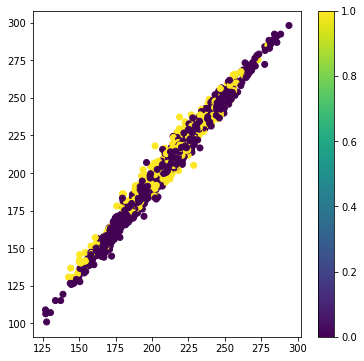

In [40]:
x_encoded = encoder.predict(np2images_train, batch_size=m)
plt.figure(figsize=(6, 6))
plt.scatter(x_encoded[:, 0], x_encoded[:, 1], c=y_train)
plt.colorbar()
plt.show()

In [41]:
AE_Classify = Sequential()
AE_Classify.add(Dense(50,activation = 'relu',input_shape=(50,)))
AE_Classify.add(Dense(32,activation = 'relu'))
AE_Classify.add(Dense(16,activation = 'relu'))
AE_Classify.add(Dense(8,activation = 'relu'))
AE_Classify.add(Dense(4,activation = 'relu'))
AE_Classify.add(Dense(2,activation = 'relu'))
AE_Classify.add(Dense(1,activation = 'sigmoid'))
print AE_Classify.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total para

In [42]:
AE_Classify.compile(optimizer='adam', loss='binary_crossentropy',
metrics=["accuracy"])
AE_Classify.fit(x_encoded, y_train, batch_size=64, nb_epoch=25,
        validation_split=.2)

Train on 1283 samples, validate on 321 samples
Epoch 1/25
1283/1283 [==============================] - 0s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 2/25
1283/1283 [==============================] - 0s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 3/25
1283/1283 [==============================] - 0s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 4/25
1283/1283 [==============================] - 0s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 5/25
1283/1283 [==============================] - 0s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 6/25
1283/1283 [==============================] - 0s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 7/25
1283/1283 [==============================] - 0s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 8/25
1283/1283 [==============================] - 0s - loss: 7.95

## Convolutional Neural Network Approach

### Shallow CNN

In [64]:
ShallowCNN=Sequential()
ShallowCNN.add(Conv2D(16, (12, 12), input_shape=(75,75,3),border_mode = 'same'))
ShallowCNN.add(Activation('relu'))
ShallowCNN.add(MaxPooling2D(pool_size=(12,12),padding='same'))
ShallowCNN.add(Flatten())
ShallowCNN.add(Dense(1, activation='sigmoid'))
print ShallowCNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 75, 75, 16)        6928      
_________________________________________________________________
activation_32 (Activation)   (None, 75, 75, 16)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 785       
Total params: 7,713
Trainable params: 7,713
Non-trainable params: 0
_________________________________________________________________
None


/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (12, 12), padding="same", input_shape=(75, 75, 3...)`
  


In [65]:
ShallowCNN.compile(optimizer='adam', loss='binary_crossentropy',
metrics=["accuracy"])
ShallowCNN.fit(np3images_train, y_train, batch_size=64, nb_epoch=25,
        validation_split=.2)

Train on 1283 samples, validate on 321 samples
Epoch 1/25
1283/1283 [==============================] - 11s - loss: 7.9414 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 2/25
1283/1283 [==============================] - 10s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 3/25
1283/1283 [==============================] - 11s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 4/25
1283/1283 [==============================] - 10s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 5/25
1283/1283 [==============================] - 11s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 6/25
1283/1283 [==============================] - 12s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 7/25
1283/1283 [==============================] - 12s - loss: 7.9526 - acc: 0.5012 - val_loss: 10.4793 - val_acc: 0.3427
Epoch 8/25
1283/1283 [==============================] - 11s - lo

In [53]:
del ConvNet

NameError: name 'ConvNet' is not defined

In [54]:

inputs1 = Input(shape=(75,75,3))
conv1=(Conv2D(16, (5, 5), input_shape=(75,75,3),border_mode = 'same'))(inputs1)
act1 = Activation('relu')(conv1)
maxpool=(MaxPooling2D(pool_size=(2,2),padding='same'))(act1)
conv2=(Conv2D(8, (4, 4),border_mode = 'same'))(maxpool)
act2 = Activation('relu')(conv2)
maxpool2=(MaxPooling2D(pool_size=(2,2),padding='same'))(act2)
conv3=(Conv2D(4, (3, 3),border_mode = 'same'))(maxpool2)
act3 = Activation('relu')(conv3)
maxpool3=(MaxPooling2D(pool_size=(2,2),padding='same'))(act3)
conv4=(Conv2D(2, (2, 2),border_mode = 'same'))(maxpool3)
act4 = Activation('relu')(conv4)
maxpool4=(MaxPooling2D(pool_size=(2,2),padding='same'))(act4)
flat = Flatten()(maxpool4)
h_q = Dense(16, activation='tanh')(flat)
outputs = Dense(1, activation='sigmoid')(h_q)

ConvNet = Model(inputs1, outputs)
print ConvNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 75, 75, 3)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 75, 75, 16)        1216      
_________________________________________________________________
activation_24 (Activation)   (None, 75, 75, 16)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 38, 38, 8)         2056      
_________________________________________________________________
activation_25 (Activation)   (None, 38, 38, 8)         0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 19, 19, 8)         0         
__________

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", input_shape=(75, 75, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (4, 4), padding="same")`
  
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), padding="same")`
  if __name__ == '__main__':
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (2, 2), padding="same")`
  if sys.path[0] == '':


In [56]:
ConvNet.compile(optimizer='adam', loss='binary_crossentropy',
metrics=["accuracy"])
ConvNet.fit(np3images_train, y_train, batch_size=64, nb_epoch=25,
        validation_split=.2)

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 1283 samples, validate on 321 samples
Epoch 1/25
1283/1283 [==============================] - 6s - loss: 0.4678 - acc: 0.7545 - val_loss: 0.5830 - val_acc: 0.5950
Epoch 2/25
1283/1283 [==============================] - 6s - loss: 0.4584 - acc: 0.7677 - val_loss: 0.5608 - val_acc: 0.6449
Epoch 3/25
1283/1283 [==============================] - 7s - loss: 0.4323 - acc: 0.7888 - val_loss: 0.5310 - val_acc: 0.6480
Epoch 4/25
1283/1283 [==============================] - 6s - loss: 0.4236 - acc: 0.7857 - val_loss: 0.5348 - val_acc: 0.6667
Epoch 5/25
1283/1283 [==============================] - 6s - loss: 0.4361 - acc: 0.7724 - val_loss: 0.6176 - val_acc: 0.5826
Epoch 6/25
1283/1283 [==============================] - 6s - loss: 0.4313 - acc: 0.7740 - val_loss: 0.4586 - val_acc: 0.7695
Epoch 7/25
1283/1283 [==============================] - 6s - loss: 0.4248 - acc: 0.7810 - val_loss: 0.5175 - val_acc: 0.6822
Epoch 8/25
1283/1283 [==============================] - 6s - loss: 0.4125 - ac

In [48]:

inputs1 = Input(shape=(75,75,3))
conv1=(Conv2D(16, (5, 5), input_shape=(75,75,3),border_mode = 'same'))(inputs1)
act1 = Activation('relu')(conv1)
conv2=(Conv2D(16, (5, 5), input_shape=(75,75,3),border_mode = 'same'))(act1)
act2 = Activation('relu')(conv2)
maxpool=(MaxPooling2D(pool_size=(2,2),padding='same'))(act2)
conv3=(Conv2D(8, (4, 4),border_mode = 'same'))(maxpool)
act3 = Activation('relu')(conv3)
conv4=(Conv2D(8, (4, 4),border_mode = 'same'))(act3)
act4 = Activation('relu')(conv4)
maxpool2=(MaxPooling2D(pool_size=(2,2),padding='same'))(act4)
conv5=(Conv2D(4, (3, 3),border_mode = 'same'))(maxpool2)
act5 = Activation('relu')(conv5)
maxpool3=(MaxPooling2D(pool_size=(2,2),padding='same'))(act5)
conv6=(Conv2D(2, (2, 2),border_mode = 'same'))(maxpool3)
act6 = Activation('relu')(conv6)
maxpool4=(MaxPooling2D(pool_size=(2,2),padding='same'))(act6)
flat = Flatten()(maxpool4)
h_q = Dense(16, activation='tanh')(flat)
outputs = Dense(1, activation='sigmoid')(h_q)

ConvNet2 = Model(inputs1, outputs)
print ConvNet2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 75, 75, 3)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 16)        1216      
_________________________________________________________________
activation_17 (Activation)   (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 75, 75, 16)        6416      
_________________________________________________________________
activation_18 (Activation)   (None, 75, 75, 16)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 38, 38, 8)         2056      
__________

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", input_shape=(75, 75, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", input_shape=(75, 75, 3...)`
  """
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (4, 4), padding="same")`
  
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (4, 4), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 

In [49]:
ConvNet2.compile(optimizer='adam', loss='binary_crossentropy',
metrics=["accuracy"])
ConvNet2.fit(np3images_train, y_train, batch_size=64, nb_epoch=25,
        validation_split=.2)

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 1283 samples, validate on 321 samples
Epoch 1/25
1283/1283 [==============================] - 20s - loss: 0.6848 - acc: 0.5448 - val_loss: 0.6612 - val_acc: 0.6573
Epoch 2/25
1283/1283 [==============================] - 19s - loss: 0.6696 - acc: 0.5955 - val_loss: 0.6212 - val_acc: 0.6573
Epoch 3/25
1283/1283 [==============================] - 20s - loss: 0.6290 - acc: 0.6298 - val_loss: 0.6311 - val_acc: 0.5452
Epoch 4/25
1283/1283 [==============================] - 20s - loss: 0.5822 - acc: 0.6586 - val_loss: 0.6353 - val_acc: 0.5358
Epoch 5/25
1283/1283 [==============================] - 22s - loss: 0.5581 - acc: 0.6968 - val_loss: 0.6836 - val_acc: 0.5514
Epoch 6/25
1283/1283 [==============================] - 22s - loss: 0.5278 - acc: 0.7241 - val_loss: 0.5948 - val_acc: 0.5763
Epoch 7/25
1283/1283 [==============================] - 21s - loss: 0.5212 - acc: 0.7116 - val_loss: 0.6323 - val_acc: 0.5857
Epoch 8/25
1283/1283 [==============================] - 21s - loss: 0.5

## CNN With Data Preprocessed with Gaussian Filter

In [71]:
images_train=[]
for cnt,img in enumerate(band1_train):
    images_train.append([skimage.filters.gaussian(np.array(band1_train[cnt]).reshape(75,75)), skimage.filters.gaussian(np.array(band2_train[cnt]).reshape(75,75))])

gauss_images_train = np.array(images_train)
gauss_images_train=np.reshape(gauss_images_train,(1604,75,75,2))
print gauss_images_train.shape

images_test=[]
for cnt,img in enumerate(band1_test):
    images_test.append([skimage.filters.gaussian(np.array(band1_test[cnt]).reshape(75,75)),skimage.filters.gaussian(np.array(band2_test[cnt]).reshape(75,75))])
gauss_images_test = np.array(images_test)
gauss_images_test=np.reshape(gauss_images_test,(8424,75,75,2))

print gauss_images_test.shape


(1604, 75, 75, 2)
(8424, 75, 75, 2)


In [72]:
inputs1 = Input(shape=(75,75,2))
conv1=(Conv2D(16, (5, 5), input_shape=(75,75,2),border_mode = 'same'))(inputs1)
act1 = Activation('relu')(conv1)
maxpool=(MaxPooling2D(pool_size=(2,2),padding='same'))(act1)
conv2=(Conv2D(8, (4, 4),border_mode = 'same'))(maxpool)
act2 = Activation('relu')(conv2)
maxpool2=(MaxPooling2D(pool_size=(2,2),padding='same'))(act2)
conv3=(Conv2D(4, (3, 3),border_mode = 'same'))(maxpool2)
act3 = Activation('relu')(conv3)
maxpool3=(MaxPooling2D(pool_size=(2,2),padding='same'))(act3)
conv4=(Conv2D(2, (2, 2),border_mode = 'same'))(maxpool3)
act4 = Activation('relu')(conv4)
maxpool4=(MaxPooling2D(pool_size=(2,2),padding='same'))(act4)
flat = Flatten()(maxpool4)
h_q = Dense(16, activation='tanh')(flat)
outputs = Dense(1, activation='sigmoid')(h_q)

ConvNet3 = Model(inputs1, outputs)
ConvNet3.compile(optimizer='adam', loss='binary_crossentropy',
metrics=["accuracy"])
ConvNet3.fit(gauss_images_train, y_train, batch_size=64, nb_epoch=50,
        validation_split=.1)

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", input_shape=(75, 75, 2...)`
  
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (4, 4), padding="same")`
  """
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), padding="same")`
  
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (2, 2), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1443 samples, validate on 161 samples
Epoch 1/50
1443/1443 [==============================] - 6s - loss: 0.6775 - acc: 0.5870 - val_loss: 0.6485 - val_acc: 0.5963
Epoch 2/50
1443/1443 [==============================] - 6s - loss: 0.6489 - acc: 0.6161 - val_loss: 0.7073 - val_acc: 0.5155
Epoch 3/50
1443/1443 [==============================] - 7s - loss: 0.6494 - acc: 0.6348 - val_loss: 0.6721 - val_acc: 0.5528
Epoch 4/50
1443/1443 [==============================] - 7s - loss: 0.6174 - acc: 0.6466 - val_loss: 0.6243 - val_acc: 0.5776
Epoch 5/50
1443/1443 [==============================] - 7s - loss: 0.6019 - acc: 0.6674 - val_loss: 0.6037 - val_acc: 0.5776
Epoch 6/50
1443/1443 [==============================] - 6s - loss: 0.5931 - acc: 0.6743 - val_loss: 0.5739 - val_acc: 0.6335
Epoch 7/50
1443/1443 [==============================] - 7s - loss: 0.5861 - acc: 0.6660 - val_loss: 0.6671 - val_acc: 0.4907
Epoch 8/50
1443/1443 [==============================] - 7s - loss: 0.5778 - ac

In [74]:
DeepCNN=Sequential()
DeepCNN.add(Conv2D(4, (3, 3), input_shape=(75,75,2),border_mode = 'same'))
DeepCNN.add(Activation('relu'))
DeepCNN.add(Conv2D(16, (6, 6),border_mode = 'same'))
DeepCNN.add(Activation('elu'))
DeepCNN.add(Conv2D(32, (12, 12),border_mode = 'same'))
DeepCNN.add(Activation('elu'))
DeepCNN.add(Conv2D(16, (15, 15),border_mode = 'same'))
DeepCNN.add(Activation('elu'))
DeepCNN.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNN.add(Conv2D(8, (3, 3),border_mode = 'same'))
DeepCNN.add(Activation('relu'))
DeepCNN.add(Conv2D(16, (5, 5),border_mode = 'same'))
DeepCNN.add(Activation('elu'))
DeepCNN.add(Conv2D(32, (7, 7),border_mode = 'same'))
DeepCNN.add(Activation('elu'))
DeepCNN.add(Conv2D(64, (10, 10),border_mode = 'same'))
DeepCNN.add(Activation('elu'))
DeepCNN.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNN.add(Conv2D(32, (2, 2),border_mode = 'same'))
DeepCNN.add(Activation('relu'))
DeepCNN.add(Conv2D(16, (4, 4),border_mode = 'same'))
DeepCNN.add(Activation('elu'))
DeepCNN.add(Conv2D(8, (6, 6),border_mode = 'same'))
DeepCNN.add(Activation('elu'))
DeepCNN.add(MaxPooling2D(pool_size=(2,2),padding='same'))

DeepCNN.add(Flatten())
DeepCNN.add(Dense(256, activation='tanh'))
DeepCNN.add(Dense(64, activation='tanh'))
DeepCNN.add(Dense(8, activation='tanh'))
DeepCNN.add(Dense(1, activation='sigmoid'))
print DeepCNN.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 75, 75, 4)         76        
_________________________________________________________________
activation_48 (Activation)   (None, 75, 75, 4)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 16)        2320      
_________________________________________________________________
activation_49 (Activation)   (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 75, 75, 32)        73760     
_________________________________________________________________
activation_50 (Activation)   (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 75, 75, 16)        115216    
__________

/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), padding="same", input_shape=(75, 75, 2...)`
  
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (6, 6), padding="same")`
  after removing the cwd from sys.path.
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (12, 12), padding="same")`
  
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (15, 15), padding="same")`
  
/home/andrew/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/.loca

In [77]:
DeepCNN.compile(optimizer='adam', loss='binary_crossentropy',
metrics=["accuracy"])
DeepCNN.fit(gauss_images_train, y_train, batch_size=64, nb_epoch=100,
        validation_split=.2)

Train on 1283 samples, validate on 321 samples
Epoch 1/100
 768/1283 [================>.............] - ETA: 186s - loss: 0.7297 - acc: 0.5195

KeyboardInterrupt: 